## Лабораторная работа №6. Решение моделей в непрерывном и дискретном времени

## Решение примеров

### 6.2.1.  Решение обыкновенных дифференциальных уравнений

Для решения обыкновенных дифференциальных уравнений (ОДУ) в Julia можно использовать пакет diffrentialEquations.jl.

#### 6.2.1.1.  Модель экспоненциального роста

Рассмотрим пример использования этого пакета для решение уравнения модели экспоненциального роста, описываемую уравнением
$$ u'(t)=au(t),     u(0)=u_0.$$
где $a$ - коэффициент роста.
Предположим, что заданы следующие начальные данные $a=0,98$, $u(0)=1,0$, $t \in [0;1,0]$
Аналитическое решение модели имеет вид:
$$ u(t)=u_0exp(at)u(t).$$

In [8]:
# подключаем необходимые пакеты:
import Pkg
Pkg.add("DifferentialEquations")
using DifferentialEquations
# задаём описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
# задаём интервал времени:
tspan = (0.0,1.0)
# решение:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

   Resolving package versions...
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Manifest.toml`


retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.3521860297865888
 0.6934436122197829
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908713484919
 1.9730384457359198
 2.6644561424814266

   Resolving package versions...
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Manifest.toml`


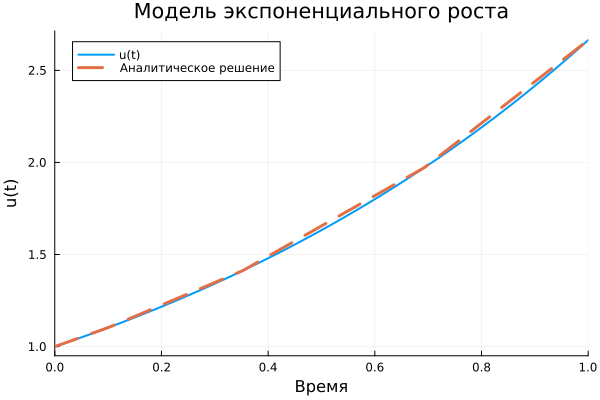

In [9]:
# подключаем необходимые пакеты:
Pkg.add("Plots")
using Plots
# строим графики:
plot(sol, linewidth=2,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="u(t)")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

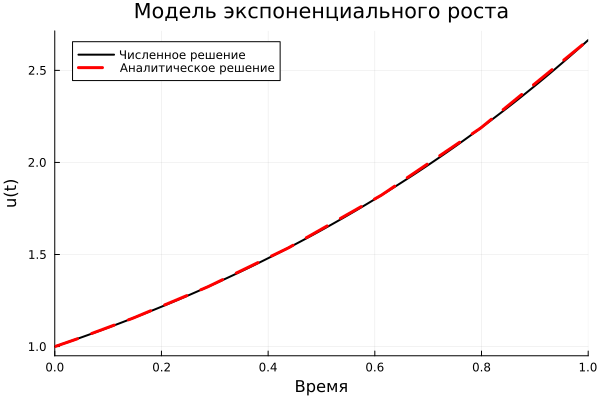

In [10]:
# задаём точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
#println(sol)
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

#### 6.2.1.2. Система Лоренца

Динамической системой Лоренца является нелинейная автономная система обыкновенных дифференциальных уравнений третьего порядка:
$$\left\{
\begin{aligned}
\dot{x}&=\sigma (y-x),\\
\dot{y}&=\rho x-y-xz, \\ 
\dot{z}&=xy-\beta z  
\end{aligned}
\right.
$$
где  $ \sigma, \rho, \beta$— параметры системы (некоторые положительные числа, обычно указывают  $ \sigma = 10, \rho = 28, \beta = \frac{8}{3}$).
Система получена из системы уравнений Навье–Стокса и описывает движение воздушных потоков в плоском слое жидкости постоянной толщины при разложении скорости течения и температуры в двойные ряды Фурье с последующем усечением до первых-вторых гармоник.
Решение системы неустойчиво на аттракторе, что не позволяет применять классические численные методы на больших отрезках времени, требуется использовать высокоточные вычисления.
Численное решение в Julia будет иметь следующий вид:

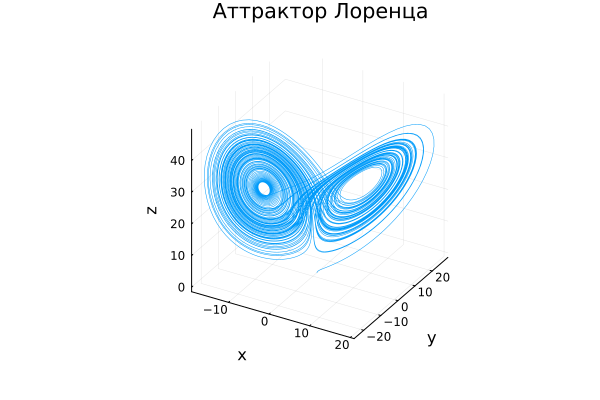

In [13]:
# задаём описание модели:
function lorenz!(du,u,p,t)
σ,ρ,β = p
du[1] = σ*(u[2]-u[1])
du[2] = u[1]*(ρ-u[3]) - u[2]
du[3] = u[1]*u[2] - β*u[3]
end
# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)
# строим график:
plot(sol, vars=(1,2,3), lw=0.5, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

Можно отключить интерполяцию

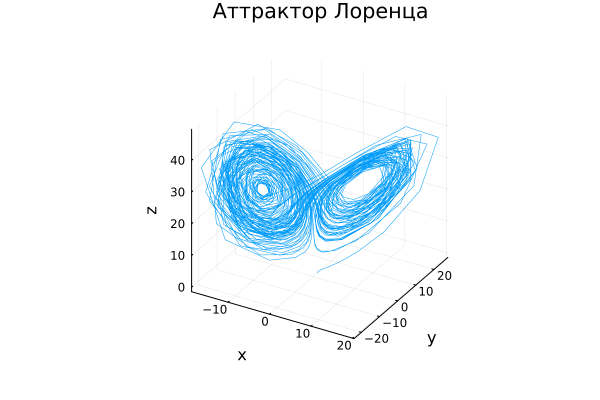

In [17]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=0.5, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)

### 6.2.2. Модель Лотки–Вольтерры

Модель Лотки–Вольтерры описывает взаимодействие двух видов типа «хищник – жертва»:
$$\left\{
\begin{aligned}
\dot{x}&=(\alpha -\beta y)x,\\
\dot{y}&=(-\gamma +\delta x)y
\end{aligned}
\right.
$$
где $x$ — количество жертв, $y$ — количество хищников, $t$ — время, $\alpha, \beta, \gamma, \delta$ — коэффициенты, отражающие взаимодействия между видами (в данном случае $\alpha$ — коэффициент рождаемости жертв, $\gamma$ — коэффициент убыли хищников, $\beta$ — коэффициент убыли жертв в результате взаимодействия с хищниками, $\delta$ — коэффициент роста численности хищников).
Численное решение в Julia будет иметь следующий вид (рис. 6.5):

   Resolving package versions...
   Installed Tricks ────────────────── v0.1.9
   Installed CompositeTypes ────────── v0.1.4
   Installed FindFirstFunctions ────── v1.4.1
   Installed MultivariatePolynomials ─ v0.5.7
   Installed MutableArithmetics ────── v1.6.0
   Installed DomainSets ────────────── v0.7.14
   Installed Bijections ────────────── v0.1.9
   Installed JuliaFormatter ────────── v1.0.62
   Installed Glob ──────────────────── v1.3.1
   Installed Symbolics ─────────────── v6.22.0
   Installed DynamicPolynomials ────── v0.6.1
   Installed CommonMark ────────────── v0.8.15
   Installed DispatchDoctor ────────── v0.4.17
   Installed ParameterizedFunctions ── v5.17.0
   Installed SymbolicLimits ────────── v0.2.2
   Installed ModelingToolkit ───────── v9.58.0
   Installed Tokenize ──────────────── v0.5.29
   Installed Combinatorics ─────────── v1.0.2
   Installed AbstractTrees ─────────── v0.4.5
   Installed SCCNonlinearSolve ─────── v1.0.0
   Installed IntervalSets ──────────── 

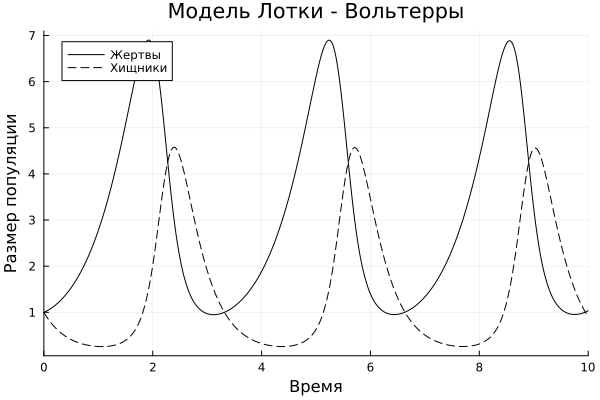

In [18]:
# подключаем необходимые пакеты:
import Pkg
Pkg.add("ParameterizedFunctions")
using ParameterizedFunctions, DifferentialEquations, Plots;
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d
# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0)
# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры", xaxis="Время",yaxis="Размер популяции")


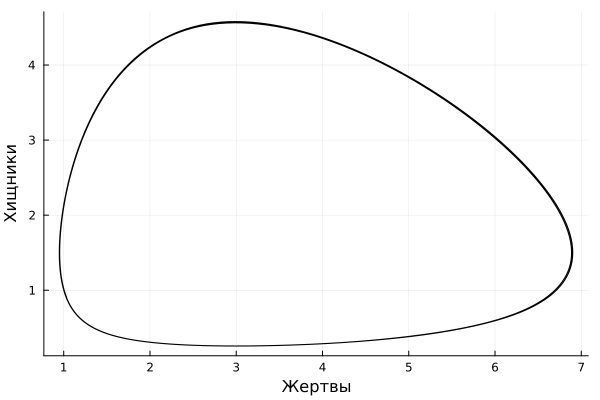

In [19]:
# фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

## Самостоятельная работа

### Задание 1
Реализовать и проанализировать модель роста численности изолированной популяции (модель Мальтуса):
$$\dot{x}=ax, a=b-c.$$
где $x(t)$ — численность изолированной популяции в момент времени $t,a$ — коэффициент роста популяции, $b$ — коэффициент рождаемости, $c$ — коэффициент смертности.
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

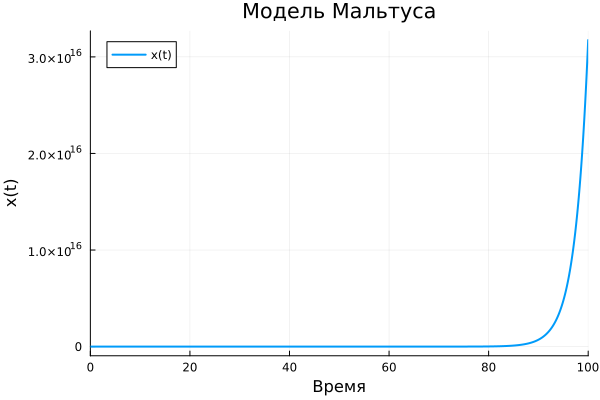

In [341]:
#x'(t)=ax(t)
#a=b-c
# задаём описание модели с начальными условиями:
b = 1.36 # коэф.рождаемости
c = 0.98 # коэф.смертности
a = b - c
f(x,p,t) = a*x
x0 = 1.0
# задаём интервал времени:
tspan = (0.0,100.0)
# решение:
prob = ODEProblem(f,x0,tspan)
sol = solve(prob)
# строим графики:
plot(sol, linewidth=2,title="Модель Мальтуса", xaxis="Время",yaxis="x(t)",label="x(t)")

In [342]:
import Pkg
Pkg.add("Distributions")
using Distributions
import Pkg
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\noname\.julia\environments\v1.10\Manifest.toml`


[ Info: Saved animation to C:\Users\noname\Модель Мальтуса.gif


Plots.AnimatedGif("C:\\Users\\noname\\Модель Мальтуса.gif")
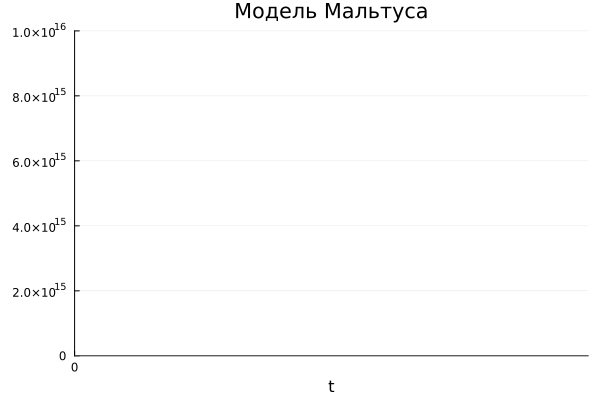

In [345]:
task1_gif = @animate for i in 1:100
    tspan = (0,i)
    prob_1 = ODEProblem(f,x0,tspan)
    sol_1 = solve(prob_1)
    plot(xlim=[0,100], ylim=[0,1*10^16], xticks=(0:20:100), legend=false, title="Модель Мальтуса")
    plot!(sol_1)
end
gif(task1_gif, "Модель Мальтуса.gif", fps = 10)

### Задание 2
Реализовать и проанализировать логистическую модель роста популяции, заданную
уравнением:
$$ \dot{x} = rx{(1- \frac{x}{k})}, r>0, k>0, $$
𝑟 — коэффициент роста популяции, 𝑘 — потенциальная ёмкость экологической системы (предельное значение численности популяции). Начальные данные и параметры
задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в
том числе с анимацией).

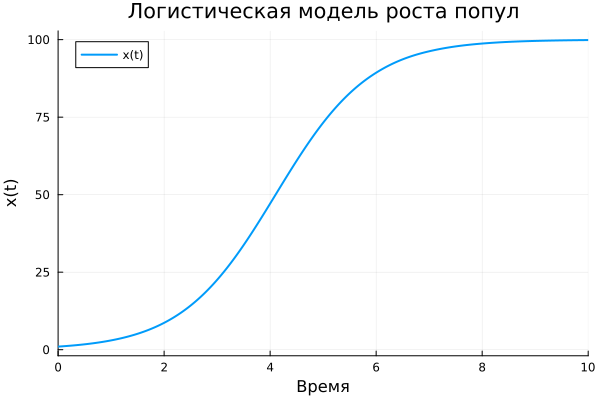

In [347]:
# задаём описание модели с начальными условиями:
r = 1.12
k = 100
f(x,p,t) = r*x*(1-x/k)
x0 = 1.0
# задаём интервал времени:
tspan = (0.0,10.0)
# решение:
prob = ODEProblem(f,x0,tspan)
sol = solve(prob)
# строим графики:
plot(sol, linewidth=2,title="Логистическая модель роста попул", xaxis="Время",yaxis="x(t)",label="x(t)")

[ Info: Saved animation to C:\Users\noname\Задание 2.gif


Plots.AnimatedGif("C:\\Users\\noname\\Задание 2.gif")
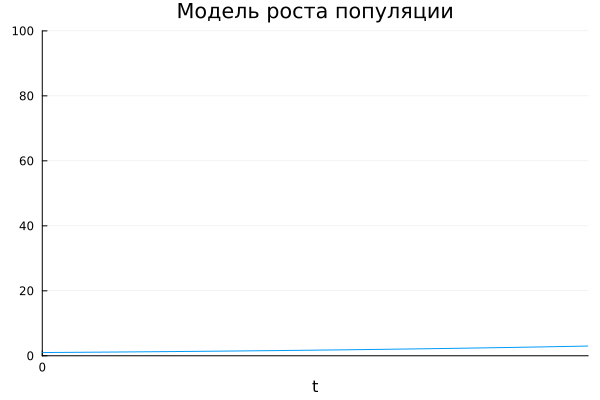

In [348]:
task2_gif = @animate for i in 1:10
    tspan = (0,i)
    prob = ODEProblem(f,x0,tspan)
    sol = solve(prob)
    plot(xlim=[0,10], ylim=[0,100], xticks=(0:2:10), legend=false, title="Модель роста популяции")
    plot!(sol)
end
gif(task2_gif, "Задание 2.gif", fps = 10)

### Задание 3
Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIR-модель):
$$\left\{
\begin{aligned}
\dot{s}&=-\beta is,\\
\dot{i}&=\beta is-vi, \\ 
\dot{r}&=vi  
\end{aligned}
\right.
$$
где $s(t)$ — численность восприимчивых к болезни индивидов в момент времени $t$, $i(t)$ — численность инфицированных индивидов в момент времени $t$, $r(t)$ — численность переболевших индивидов в момент времени $t$, $\beta$ — коэффициент интенсивности контактов индивидов с последующим инфицированием, $v$ — коэффициент интенсивности выздоровления инфицированных индивидов. Численность популяции считается постоянной, т.е. ̇$\dot{s}+\dot{i}+\dot{r}=0$. Начальные данные и параметры задать
самостоятельно и пояснить их выбор. Построить соответствующие графики (в том
числе с анимацией).

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit C:\Users\noname\.julia\packages\ModelingToolkit\NQQXr\src\utils.jl:119


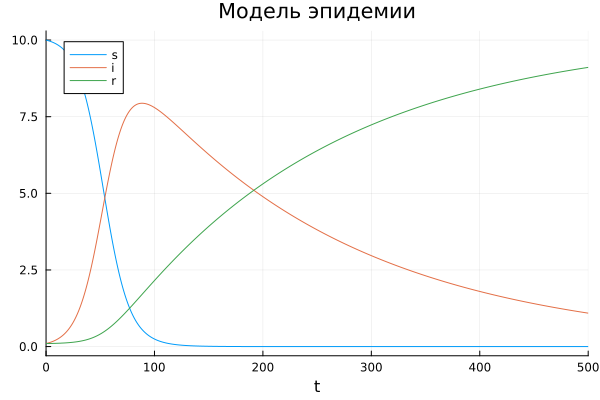

In [349]:
#using ParameterizedFunctions, DifferentialEquations, Plots;
task3! = @ode_def KerMak begin
    ds = -β*i*s
    di = β*i*s-υ*i
    dr = υ*i
end β υ
# задаём начальное условие:
u0 = [10.0,0.1,0.1]
# задаём значения параметров:
p = (0.009,0.005)
# задаём интервал времени:
tspan = (0.0,500)
# решение:
prob = ODEProblem(task3!,u0,tspan,p)
sol = solve(prob)
plot(sol, title = "Модель эпидемии" )


[ Info: Saved animation to C:\Users\noname\Задание 3.gif


Plots.AnimatedGif("C:\\Users\\noname\\Задание 3.gif")
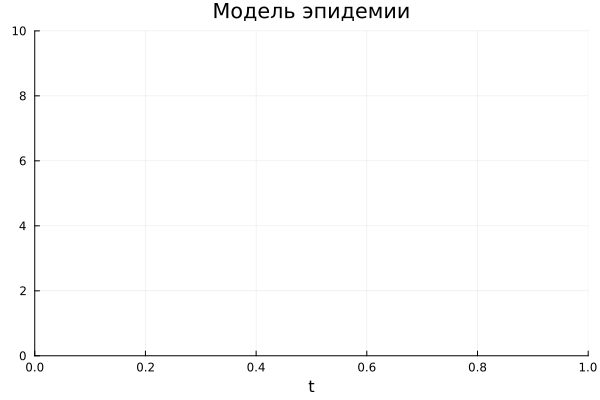

In [350]:
task3_gif = @animate for i in 1:29
    plot(xlim=(0,500), ylim=(0,10), legend=false, title = "Модель эпидемии" )
    plot!(sol[1:i])
end 
gif(task3_gif,"Задание 3.gif", fps=6)

### Задание 4 
Как расширение модели SIR (Susceptible-Infected-Removed) по результатом эпидемии
испанки была предложена модель SEIR (Susceptible-Exposed-Infected-Removed):
$$\left\{
\begin{aligned}
\dot{s}(t)&=-\frac{\beta}{N} s(t)i(t),\\
\dot{e}(t)&=\frac{\beta}{N} s(t)i(t)- \delta e(t), \\ 
\dot{i}(t)&=\delta e(t)-\gamma i(t), \\ 
\dot{r}(t)&=\gamma i(t)
\end{aligned}
\right.
$$
Размер популяции сохраняется:
$$s(t)+e(t)+i(t)+r(t)=N $$
Исследуйте, сравните с SIR.

┌ Warning: Independent variable t should be defined with @independent_variables t.
└ @ ModelingToolkit C:\Users\noname\.julia\packages\ModelingToolkit\NQQXr\src\utils.jl:119


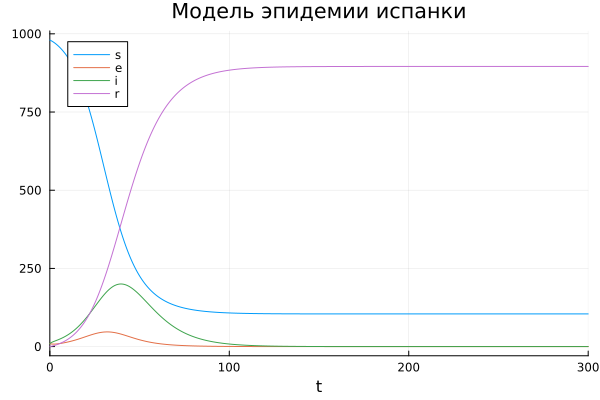

In [356]:
N = 1000
p = [0.25,0.5,0.1]
u0 = [980,10,10,0.1]
tspan = (0.0,300.0)
task4 = @ode_def SEIR begin
    ds = -β/N*s*i
    de = β/N*s*i - δ*e  # болеют но не заразны, инкубационный период
    di = δ*e - γ*i
    dr = γ*i
end β δ γ
prob = ODEProblem(task4,u0,tspan,p)
sol = solve(prob)
plot(sol, title = "Модель эпидемии испанки" )

### Задание 5
 Для дискретной модели Лотки–Вольтерры:
$$\left\{
\begin{aligned}
X_1(t+1)&=aX_1(t)(1-X_1(t))-X_1(t)X_2(t), \\
X_2(t+1)&=-cX_2(t)+dX_1(t)X_2(t).
\end{aligned}
\right.
$$
с начальными данными 𝑎 = 2, 𝑐 = 1, 𝑑 = 5 найдите точку равновесия. Получите и сравните аналитическое и численное решения. Численное решение изобразите на фазовом портрете


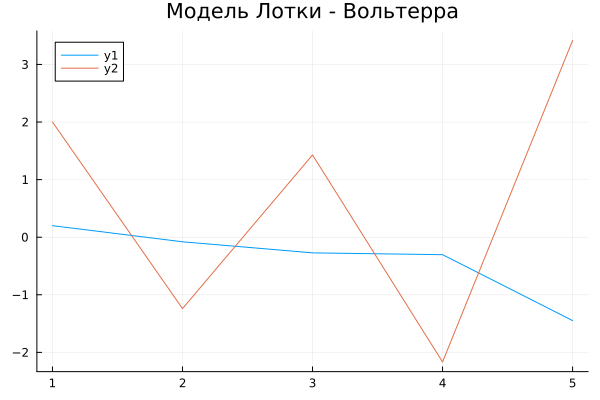

In [357]:
function task5(x0, p, t)
    a, b, c, d = p #parameters 
    x1 = [x0[1]] #vector
    x2 = [x0[2]]
    for i=2:t
        res_x1 = a*x1[end]*(1-x1[end])-b*x1[end]*x2[end] #x1(t+1)
        append!(x1, res_x1)
        res_x2 = -c*x2[end]+d*x1[end-1]*x2[end] #x2(t+1)
        append!(x2, res_x2)
    end
    return [x1, x2]
end

#задаем параметры, по условию b=1, остальное на вкус
p = [2, 1, 1, 1.9]
x0 = [0.2, 2]
tspan = 5

sol = task5(x0, p, tspan)
plot(sol, title = "Модель Лотки - Вольтерра" )

### Задание 6
Реализовать на языке Julia модель отбора на основе конкурентных отношений:
$$\left\{
\begin{aligned}
\dot{x}&=\alpha x-\beta xy,\\
\dot{y}&=\alpha y-\beta xy. 
\end{aligned}
\right.
$$
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

In [358]:
function task6(du, u, p, t)
    α,β = p
    du[1] = α*u[1]-β*u[1]*u[2]
    du[2] = α*u[2]-β*u[1]*u[2]
end
p = [0.1, 0.2]
u0 = [25, 50]
tspan = 5
prob = ODEProblem(task6, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 29-element Vector{Float64}:
 0.0
 0.03866448990950899
 0.08307941883347833
 0.14485128670650066
 0.21677628688799638
 0.29907143377221446
 0.3933402671878564
 0.4982161707182172
 0.6128972643219486
 0.7356693576401105
 0.8650551181802472
 0.9994902324056578
 1.1376971015076198
 ⋮
 1.8599657004800358
 2.013244964760887
 2.175017287513237
 2.3500659380030413
 2.544161788224626
 2.764617721498443
 3.0214270022984864
 3.3292676472657514
 3.710465295720748
 4.193978957539056
 4.7699835434160995
 5.0
u: 29-element Vector{Vector{Float64}}:
 [25.0, 50.0]
 [17.58180805786677, 42.67865639155934]
 [12.386627869849317, 37.595191584924336]
 [8.057278619523144, 33.42204228274898]
 [5.127681891556539, 30.675539279382015]
 [3.170306008460308, 28.929277355157822]
 [1.8755369030360465, 27.878483222664997]
 [1.0630339185236197, 27.34012352563658]
 [0.5759302012457053, 27.156102919053446]
 [0.2992367844887302, 27.207751282983327]
 [0.14957395039237592, 

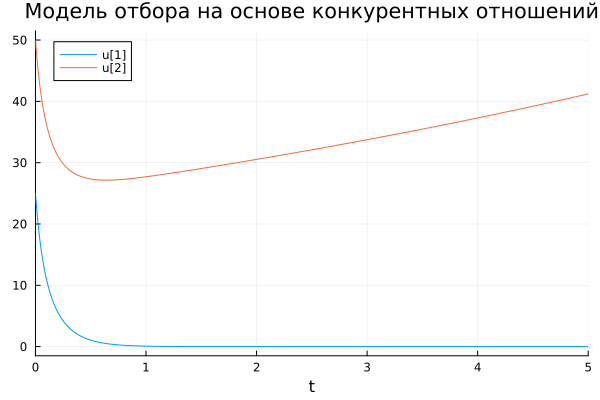

In [359]:
plot(sol, title = "Модель отбора на основе конкурентных отношений" )

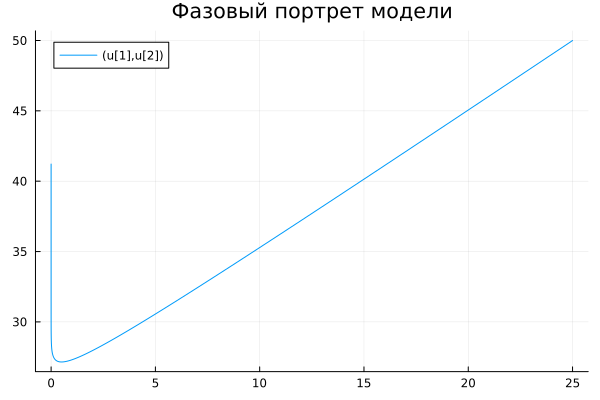

In [360]:
plot(sol, vars=(1,2), title = "Фазовый портрет модели" )

### Задание 7
Реализовать на языке Julia модель консервативного гармонического осциллятора
$$ \ddot {x} + \omega ^2_0 x=0,  x(t_0)=x_0, \dot{x} (t_0)=y_0$$
где $𝜔_0$ — циклическая частота. Начальные параметры подобрать самостоятельно,
выбор пояснить. Построить соответствующие графики (в том числе с анимацией)
и фазовый портрет

In [361]:
#ddx = -w^2*x
#dx = y
#x=x0
#we should use second order ode problem for ''
function task7(ddx, dx, x, ω, t)
    ddx .= - ω^2 * x
end


task7 (generic function with 1 method)

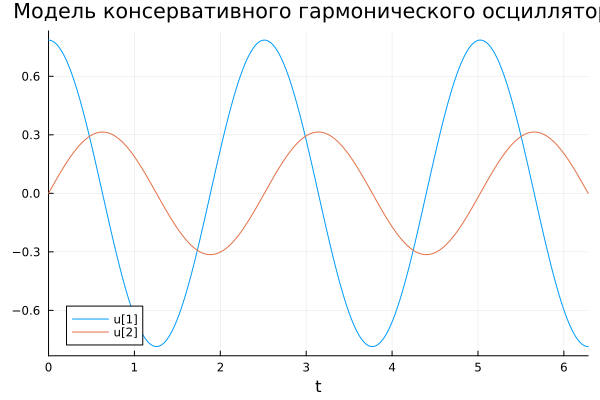

In [362]:
x0 = [0.0]
dx0 = [pi/4]
ω = 2.5
tspan = (0.0, 2pi)
prob = SecondOrderODEProblem(task7, dx0, x0, tspan, ω)
sol=solve(prob)
plot(sol, title="Модель консервативного гармонического осциллятора")

### Задание 8
Реализовать на языке Julia модель свободных колебаний гармонического осциллятора
$$ \ddot {x} + 2 \gamma \dot {x} + \omega ^2_0 x=0,  x(t_0)=x_0, \dot{x} (t_0)=y_0$$
где $𝜔_0$ — циклическая частота, $\gamma$ — параметр, характеризующий потери энергии.
Начальные параметры подобрать самостоятельно, выбор пояснить. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

In [363]:
#ddx = -w^2*x
#dx = y
#x=x0
#we should use second order ode problem for ''
function task8(ddx, dx, x, p, t)
    γ, ω = p
    ddx .= - ω^2 * x .- 2 * γ *dx
end


task8 (generic function with 1 method)

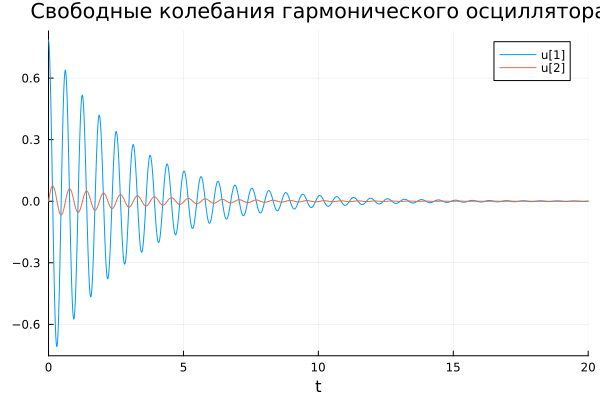

In [364]:
x0 = [0.0]
dx0 = [pi/4]
ω = [1/3,10]
tspan = (0.0, 20)
prob = SecondOrderODEProblem(task8, dx0, x0, tspan, ω)
sol=solve(prob)
plot(sol, title="Свободные колебания гармонического осциллятора")

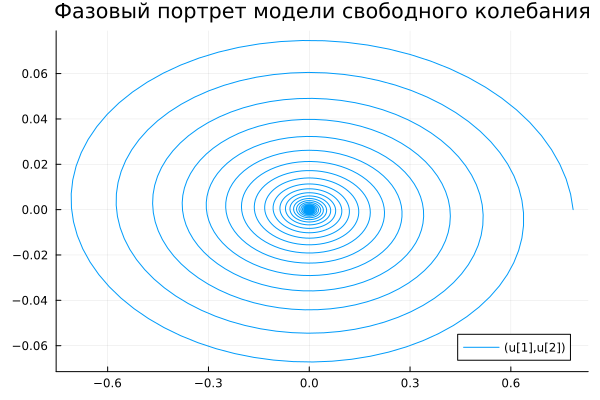

In [365]:
plot(sol, vars=(1,2), title="Фазовый портрет модели свободного колебания" )